# Process Dynamics and Control
## Chapter 5 Exercises:

In [1]:
# Importing modules from SymPy
from sympy import laplace_transform,inverse_laplace_transform,Symbol,N,plot

In [2]:
# Creating Symbols to use in the Laplace Transforms.
s = Symbol('s')
t = Symbol('t',real=True,positive=True)

In [3]:
# Creating Functions to handle Laplace Transforms.
def L(f):
    # noconds exclude the conditions for the laplace transform returning only the equation.
    return laplace_transform(f,t,s,noconds=True)
def InvL(F):
    return inverse_laplace_transform(F,s,t)
def Eval(f,x):
    val = N(f.subs({t:x}))
    print("y(t="+str(x)+") = {:.2f}".format(val))

## Exercise 5.5

A thermocouple has the following characteristics when it is immersed in a stirred bath:


- Mass of thermocouple = 1 g
- Heat capacity of thermocouple = 0.25 cal/g °C
- Heat transfer coefficient = 20 cal/cm²h °C (for thermocouple and bath)
- Surface area of thermocouple = 3 cm²

#### (a)


Derive a transfer function model for the thermocouple
relating the change in its indicated output T to the change
in the temperature of its surroundings Ts assuming uniform
temperature (no gradients in the thermocouple bead), no
conduction in the leads, constant physical properties, and conversion
of the millivolt-level output directly to a °C reading
by a very fast sensor.


#### (b)


If the thermocouple is initially out of the bath and at room
temperature (23 °C), what is the maximum temperature that it
will register if it is suddenly plunged into the bath (80 °C) and
held there for 20 s?


#### (c)

Verify the result in (b) using computer simulation

## Answer

**(a)**


$$\frac{mC}{hA}\frac{dT}{dt} = (T_s - T) $$

where:

- m: Mass of Thermocouple (g)
- C: Heat Capacity of Thermocouple (cal/g°C)
- h: Heat Transfer Coiefficient (cal/cm²s)
- A: Surface Area of Thermocouple (cm²)


Deviation Variables:

- $T' = T - \bar{T}$
- $T'_s = T_s - \bar{T_s}$
- $\bar{T} =  \bar{T_s}$


Substituting the values of h,A,m and C and changing the variables to deviation form:

$$15\frac{dT'}{dt} = (T'_s - T') $$


Transfer Function Form:

$$15sT'(s) = T'_s(s) - T'(s) $$

$$T'(s) (15s+1) = T'_s(s)$$

$$G(s) = \frac{T'(s)}{T'_s(s)} = \frac{1}{15s+1}$$


We can see that the gain is 1°C/°C and the time constant is 15s.

**(b)** and **(c)**

When the thermocouple is plunged in the bath the surroundings temperature is steped  from 23°C to 80°C, hence a 57°C change.Therefore:

$$T'_s(s) = \frac{57}{s}$$

$$T'(s) = \frac{57}{s}\frac{1}{15s+1}$$


We can applied the inverse laplace and get the thermocouple response for the step change in the surroundings. To do that we'll use the SymPy library from Python.


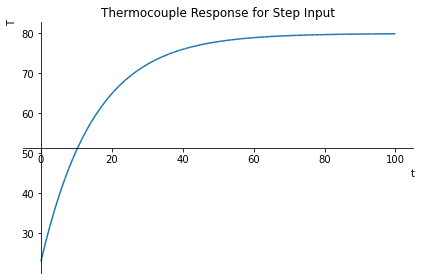

In [4]:
# Step Change
Ts = 57/s
# Transfer Function
G = 1/(15*s+1)
# Thermocouple Response in Laplace Domain
Tld = Ts*G
# Thermocouple Response in Time Domain
Ttd = InvL(Tld)
plot(Ttd+23,(t,0,100),ylabel="T",title="Thermocouple Response for Step Input");

In [5]:
Eval(Ttd+23,20)

y(t=20) = 64.97


## Exercise 5.6

$$G(s) = \frac{Y(s)}{U(s)} = \frac{10}{(5s+1)(3s+1)}$$


What is $y(t\to\infty)$ for the following inputs:


**(a)** step input of height M


**(b)** unit impulse $\delta(t)$


**(c)** $sin(t)$


**(d)** unit rectangular impulse 

## Answer
## (a)

In [6]:
# Loading limit module from SymPy for the Final Theorem Value.
from sympy import limit
# Transfer Function
G = 10/(5*s+1)/(3*s+1)
# Step Input
M = Symbol("M",real=True)
Ua = M/s
Ya = Ua*G
# Final Value Theorem.
print("y when times goes to infinity:")
limit(Ya*s,s,0)

y when times goes to infinity:


10*M

## (b)

In [7]:
Ub = 1
Yb = G*Ub
# Final Value Theorem.
print("y when times goes to infinity:")
limit(Yb*s,s,0)

y when times goes to infinity:


0

## (c)

In [8]:
from sympy import sin
uc = sin(t)
Uc = L(uc)
Yc = G*Uc
Yc.apart(s)

-(4*s + 7)/(13*(s**2 + 1)) + 625/(26*(5*s + 1)) - 27/(2*(3*s + 1))

## (d)

In [9]:
from sympy import exp
w = Symbol("w",real=True,positive=True)
Ud = 1/s*(1-exp(-w*s))
Yd = G*Ud
Yd

10*(1 - exp(-s*w))/(s*(3*s + 1)*(5*s + 1))

## Exercise 5.7

Appelpolscher has just left a meeting with Stella J.
Smarly, IGC’s vice-president for process operations and development.
Smarly is concerned about an upcoming extended
plant test of a method intended to improve the yields of a large
packed-bed reactor. The basic idea, which came from IGC’s
university consultant and was recently tested for feasibility
in a brief run, involves operating the reactor cyclically so that
nonlinearities in the system cause the time-average yield at the
exit to exceed the steady-state value. Smarly is worried about
the possibility of sintering the catalyst during an extended
run, particularly in the region of the “hotspot” (axially about
one-third of the way down the bed and at the centerline)
where temperatures invariably peak. Appelpolscher, who
plans to leave the next day on a two-week big game photo
safari, doesn’t want to cancel his vacation. On the other hand,
Smarly has told him he faces early, unexpected retirement in
Botswana if the measurement device (located near the hot
spot) fails to alert operating people and the reactor catalyst sinters.
Appelpolscher likes Botswana but doesn’t want to retire
there. He manages to pull together the following data and
assumptions before heading for the airport and leaves them
with you for analysis with the offer of the use of his swimming
pool while he is gone. What do you report to Smarly?


**Data:**


- Frequency of cyclic operation = 0.1 cycles/min
- Amplitude of thermal wave (temperature) at the measurement point obtained experimentally in the recent brief run = 15 ∘C
- Average operating temperature at the measurement point, Tmeas = 350 ∘C
- Timeconstant of temperature sensor and thermowell = 1.5 min
- Temperature at the reactor wall = 200 ∘C
- Temperature at which the catalyst sinters if operated for several hours = 700 ∘C
- Temperature at which the catalyst sinters instantaneously = 715 ∘C


**Assumptions:**


- The reactor operational cycle is approximately sinusoidal at the measurement point.
- The thermowell is located near the reactor wall so as to measure a “radial average” temperature rather than the centerline temperature.
- The approximate relation is: $$T = \frac{T_{center}+2T_{wall}}{3}$$  which also holds during transient operation.

## Answer

We know that:

- $\tau = 1.5 min$
- $T_{wall} = 200°C$
- $\omega = 2 \times \pi \times 0.1  rad/min = 0.628$
- $A = 15°C$

And the transfer function is:


$$\frac{T_m}{T} = \frac{1}{1.5s+1}$$

In [18]:
A = Symbol("A",positive=True,real=True)
om = Symbol("omega",positive=True,real=True)
tau = Symbol("tau",positive=True,real=True)
Twall = 200
T0 = 350
Tm_t = A*sin(t*om)
Tm_l = L(Tm_t)
T_l = Tm_l*(tau*s+1)
T_t = InvL(T_l)

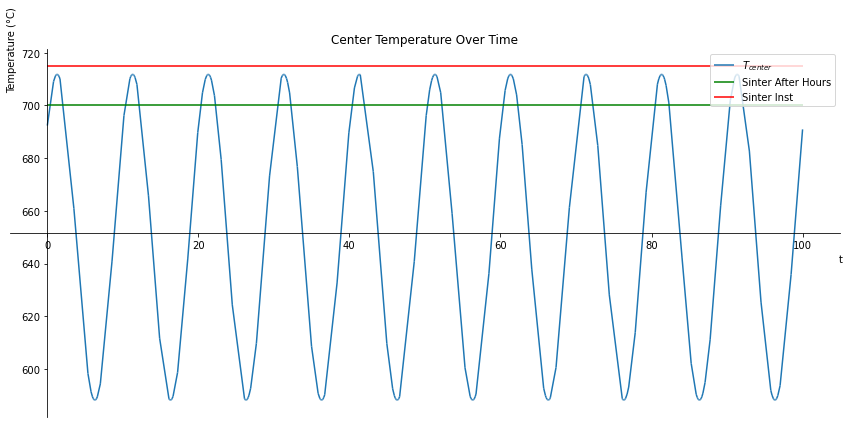

In [69]:
#
T = T_t.subs({A:15,om:0.628,tau:1.5})+350
Tcent = T*3-2*Twall
p = plot(Tcent,700,715,(t,0,100),\
         show=False\
         ,ylabel="Temperature (°C)"\
         ,title="Center Temperature Over Time"\
         ,size=(12,6),label="$T_{center}$",legend=True);
p[1].line_color = 'green'
p[2].line_color = "red"
p[1].label = 'Sinter After Hours'
p[2].label = "Sinter Inst"
p.show()

## Exercise 5.9

##  (a) 

- **System I:**


From mass balance:

$$\frac{dm}{dt} = \dot{m_{in}} - \dot{m_{out}} $$

considering constant density


$$A\frac{dh}{dt} = q_i - q $$

since the flow is in gal/min and our A (12.6ft²) and h are in ft² we need to convert the flow. gal - ft³ (x 0.1337 = B)

$$A\frac{dh}{dt} = B(q_i - 8.33h) $$

$$AsH(s) = BQ_i(s) - 8.33BH(s) \Rightarrow \frac{H(s)}{Qi(s)} = \frac{0.12}{11.28s+1}$$


- **System II:**


Since the outlet flow does no change because of the pump we have:

$$A\frac{dh}{dt} = B(q_i - q)$$

$$\frac{H(s)}{Qi(s)} = \frac{0.0106}{s}$$


## (b)

Since $q_i$ suddenly changed from 50 gal/min to 70 gal/min we have that $Q_i(s) = \frac{20}{s}$, then:


- **System I:**

$$Y(s) = \frac{0.12}{11.28s+1}\frac{20}{s}$$

- **System II:**

$$Y(s) = \frac{0.0106}{s}\frac{20}{s} $$

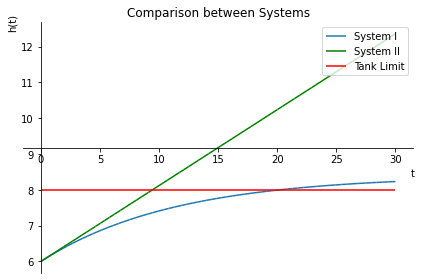

In [116]:
# Step Change
Qi = 20/s
# System I
G1 = 0.12/(11.28*s+1)
Y1 = G1*Qi
# System II
G2 = 0.0106/s
Y2 = G2*Qi
# System I Response
y1 = InvL(Y1)
# System II Response
y2 = InvL(Y2)
# Plotting Responses for the initial steady state h = 6ft
p = plot(y1+6,y2+6,8,(t,0,30),show=False,label="System I",title="Comparison between Systems",legend=True,ylabel="h(t)")
p[1].line_color = 'green'
p[2].line_color = 'r'
p[1].label="System II"
p[2].label="Tank Limit"
p.show()

In [114]:
###### Response for System I
y1

2.4 - 2.4*exp(-0.0886524822695035*t)

In [115]:
###### Response for System I
y2

0.212*t

## (c) (d) (e)

We can through the responses plot that System II does not converge to a new steady-state, while System I converges to a height close to 8.2. Furthermore, knowing that the tank height is 8 ft one can conclude that System II outflows first, because the green line (System II) in the plot crosses the red line (Tank Limit) first.


It's possible to get the exact value of the new steady state for the systems using SymPy limit function. We can choose to use the responses and take the limit as time goes to infinity or to use the Final Value Theorem and calculate the limit of $\lim_{s\to0}sY(s)$

In [104]:
K1 = limit(Y1*s,s,0)+6
K2 = limit(Y2*s,s,0)+6
print("The new steady state for System I: {:.2f} ft".format(K1))
print("The new steady state for System II: {} ft".format(K2))

The new steady state for System I: 8.40 ft
The new steady state for System II: oo ft


## Exercise 5.10

The dynamic behavior of the liquid level in a leg ofa manometer tube, responding to a change in pressure, is given by 

$$\frac{d^2h'}{dt^2} + \frac{6\mu}{R^2\rho} \frac{dh'}{dt} +\frac{3g}{2L}h' = \frac{3}{4\rho L}p'(t)$$


where h′(t) is the level of fluid measured with respect to the initial steady-state value, p′(t) is the pressure change, and R, L, g, ρ, and μ are constants.
- (a) Rearrange this equation into standard gain-time constant
form and find expressions for K, τ, ζ in terms of the physical
constants.
- (b) For what values of the physical constants does the
manometer response oscillate?
- (c) Would changing the manometer fluid so that ρ (density) is
larger make its response more oscillatory, or less? Repeat the
analysis for an increase in μ (viscosity).

## Answers

## (a)

Second-order transfer function in the standard gain-time constant form:

$$G(s) = \frac{K_p}{\tau^2s^2+2\tau\zeta s + 1 }$$


Which corresponds to:


$$\tau^2\frac{d^2y(t)}{dt^2} + 2\zeta\tau\frac{dy(t)}{dt} + y(t) = K_p u(t)$$


Therefore, the equation could be rearranged as:


$$\frac{2L}{3g} \frac{d^2h'}{dt^2} + \frac{2L}{3g} \frac{6\mu}{R^2\rho} \frac{dh'}{dt} + h' = \frac{2L}{3g} \frac{3}{4\rho L}p'(t) $$


Where:


- $\tau = \sqrt\frac{2L}{3g}$
- $\zeta =  \frac{3\mu}{R^2\rho}\sqrt\frac{2L}{3g}$
- $K_p = \frac{2L}{3g} \frac{3}{4\rho L} = \frac{1}{2\rho g} $

## (b)


The response will oscilate if $0 < \zeta < 1$, thus the response will oscilate for:

$$0 < \frac{3\mu}{R^2\rho}\sqrt\frac{2L}{3g} < 1 $$


## (c)

- $\uparrow \rho \downarrow \zeta $, hence more oscillatory.
- $\uparrow \mu \uparrow \zeta$, hence less oscillatory.

